In [23]:
!pip install pyod

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [25]:
X_train, y_train = generate_data(n_train=500, train_only=True, n_features=2)
outlier_fraction = 0.1
X_outlier, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outlier)

f1 = X_train[:,[0]].reshape(-1,1) # feature 1
f2 = X_train[:,[1]].reshape(-1,1) # features 2

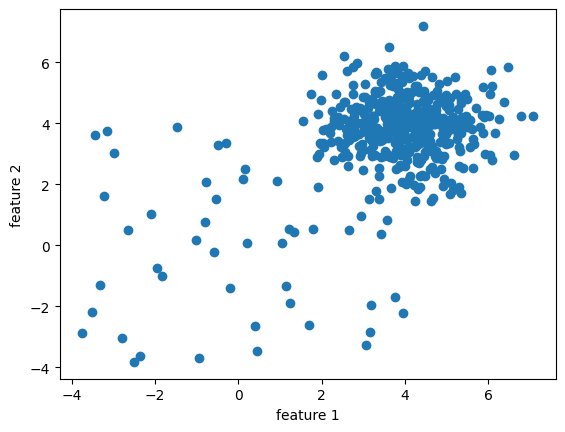

In [26]:
xx, yy = np.meshgrid(np.linspace(-15,15,500), np.linspace(-15,15,500))
plt.scatter(f1,f2)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [27]:
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)

scores_pred = clf.decision_function(X_train)*-1

y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()

print("The number of prediction errors are " +str(n_errors))

The number of prediction errors are 13


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


<ipython-input-28-d2d7ae4c1e0e>:23: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],


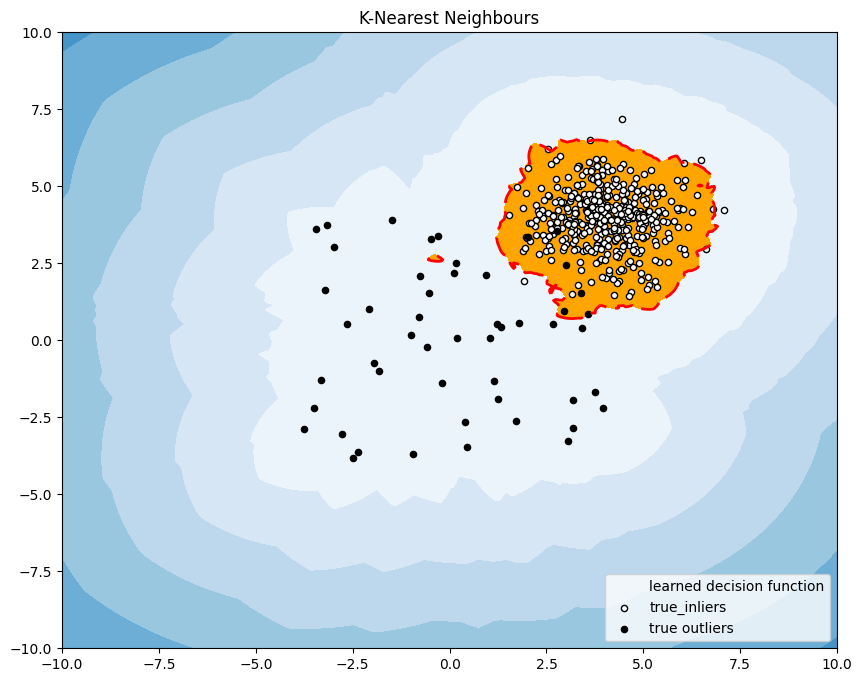

In [28]:
plt.figure(figsize=(10, 8))

threshold = stats.scoreatpercentile(scores_pred, 100*outlier_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

subplot = plt.subplot(1, 1, 1)
subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)

a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')

b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white', s=20, edgecolor='k')

c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black', s=20, edgecolor='k')
subplot.axis('tight')

subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true_inliers', 'true outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='lower right'
)

subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))

# Show the enlarged plot
plt.show()
